In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('clickRatiodata.xlsx')

In [3]:
df = df[df.ProductName.str.contains('MARQ|Magna')]
df.head()

,Reference,ItemNameType,StationID,UserName,SerialNumber,ProductName,Version,Item7,tDateTime,SO,Job_GPN,ClassCode
80,401004655,12434,0,18985,3422062003,"Sub-Assy, Top Unit, Magna, Golfer",NaN,0.25,2022-07-22 11:02:12,NaN,NaN,NaN
81,401005050,12434,0,18985,3422062000,"Sub-Assy, Top Unit, Magna, Golfer",NaN,0.26,2022-07-22 11:03:53,NaN,NaN,NaN
82,401005378,12434,0,18985,3422062034,"Sub-Assy, Top Unit, Magna, Golfer",NaN,0.24,2022-07-22 11:05:37,NaN,NaN,NaN
83,401005756,12434,0,18985,3422061999,"Sub-Assy, Top Unit, Magna, Golfer",NaN,0.27,2022-07-22 11:07:28,NaN,NaN,NaN
84,401006101,12434,0,18985,3422062018,"Sub-Assy, Top Unit, Magna, Golfer",NaN,0.26,2022-07-22 11:09:01,NaN,NaN,NaN


In [4]:
df_dup = df[df.duplicated(subset='SerialNumber',keep=False)].sort_values(['SerialNumber','tDateTime'])
df_dup.head()

,Reference,ItemNameType,StationID,UserName,SerialNumber,ProductName,Version,Item7,tDateTime,SO,Job_GPN,ClassCode
266,401366172,12434,0,18985,3422061904,"Sub-Assy, Top Unit, Magna, Aviator",NaN,0.20,2022-07-25 10:13:49,NaN,NaN,NaN
288,401373516,12434,0,18985,3422061904,"Sub-Assy, Top Unit, Magna, Aviator",NaN,0.21,2022-07-25 10:56:07,NaN,NaN,NaN
397,401483081,12434,0,26464,3422061904,"Sub-Assy, Top Unit, Magna, Aviator",NaN,0.21,2022-07-26 04:50:46,NaN,NaN,NaN
271,401367832,12434,0,18985,3422061911,"Sub-Assy, Top Unit, Magna, Aviator",NaN,0.14,2022-07-25 10:23:39,NaN,NaN,NaN
278,401370313,12434,0,18985,3422061911,"Sub-Assy, Top Unit, Magna, Aviator",NaN,0.17,2022-07-25 10:38:00,NaN,NaN,NaN


In [5]:
df_dup.drop_duplicates(subset='SerialNumber',keep='first')['ProductName'].value_counts()

Sub-Assy, Top Unit, Magna, Aviator      26
Sub-Assy, Top Unit, Magna, Captain      11
Sub-Assy, Top Unit, Magna, Golfer       10
MARQ Athlete Gen 2, NA                  10
Sub-Assy, Top Unit, Magna, Adventure     9
Sub-Assy, Top Unit, Magna, Athlete       5
MARQ Captain Gen 2, NA                   3
MARQ Aviator Gen 2, NA                   2
MARQ Golfer Gen 2, NA                    1
MARQ Adventurer Gen 2, NA                1
Name: ProductName, dtype: int64

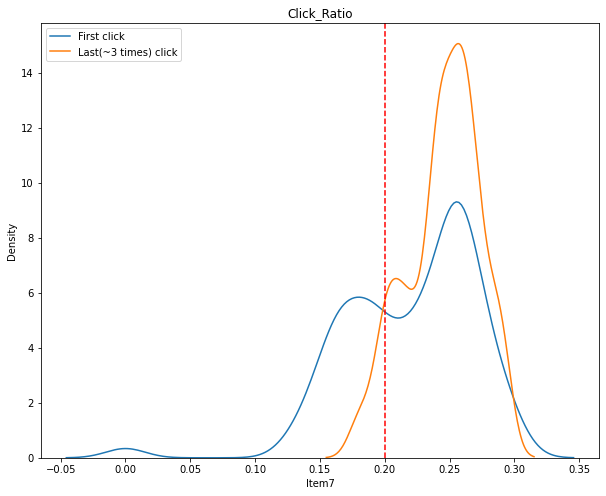

In [8]:
plt.figure(figsize=(10,8))
sns.kdeplot(data=df_dup.drop_duplicates(subset='SerialNumber',keep='first'),x='Item7', bw_method=0.3)
sns.kdeplot(data=df_dup.drop_duplicates(subset='SerialNumber',keep='last'),x='Item7',bw_method=0.3)
plt.legend(labels=['First click', 'Last(~3 times) click'])
plt.axvline(0.2, color='r', linestyle='--')
plt.title('Click_Ratio')
plt.savefig('Click_Ratio' ,bbox_inches = "tight", facecolor='white', transparent=False, dpi=300)